In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [38]:
def make_spider(df, row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30,40,50], ["10","20","30","40","50"], color="grey", size=7)
    plt.ylim(0,60)

    # Ind1
    values=df.loc[row].drop("Preferred Party").values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

In [3]:
#https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
vdf = pd.read_csv("..\Data\sa2_votes.csv")

In [4]:
# Get Census data for Selected Stats
cdf = pd.read_csv("..\Data\census_selected_statistics.csv")

In [6]:
df = pd.merge(vdf, cdf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")
df["Preferred Party"] = np.where(df["liberal/national coalition votes"] / df["totalvotes"] > 0.5, "Liberal", "ALP")

In [15]:
df = df[["Preferred Party", "median_age_persons", "median_tot_prsnl_inc_weekly"]]
df = df.groupby("Preferred Party").median()

In [16]:
religiondf = pd.read_csv("..\Data\census_religious_affimiliation.csv")

In [35]:
df2 = pd.merge(vdf, religiondf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")
df2["Preferred Party"] = np.where(df2["liberal/national coalition votes"] / df2["totalvotes"] > 0.5, "Liberal", "ALP")
df2 = df2[["Preferred Party", "christianity_tot_percent"]]
df2["median_christian_pct"] = df2["christianity_tot_percent"] * 100
df2 = df2[["Preferred Party", "median_christian_pct"]]
df2 = df2.groupby("Preferred Party").median()
df2.head()

,median_christian_pct
Preferred Party,
ALP,48.993559
Liberal,56.348083


In [36]:
pdf = pd.merge(df, df2, left_on = "Preferred Party", right_on = "Preferred Party")
pdf.reset_index(inplace = True)
pdf.head()

,Preferred Party,median_age_persons,median_tot_prsnl_inc_weekly,median_christian_pct
0,ALP,36.0,658.0,48.993559
1,Liberal,41.0,646.5,56.348083


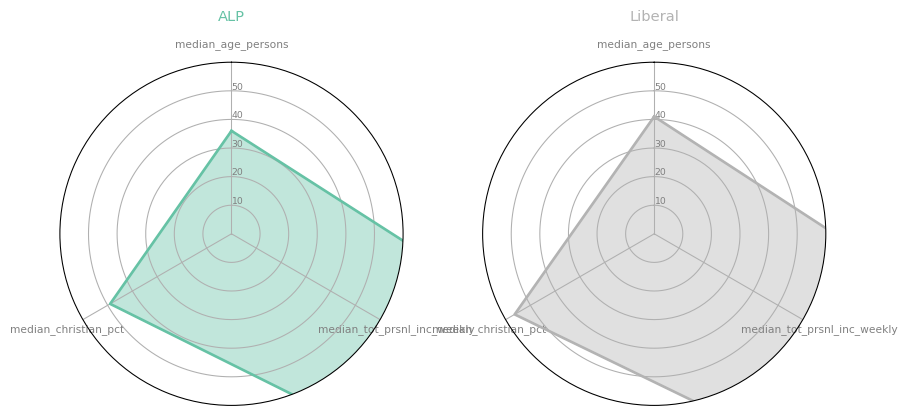

In [39]:
# Initialize the figure
my_dpi = 96
plt.figure(figsize = (1000/my_dpi, 1000/my_dpi), dpi = my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(pdf.index))

# Loop to plot
for row in range(0, len(pdf.index)):
    make_spider(pdf, row=row, title=pdf["Preferred Party"][row], color=my_palette(row))
